In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
import numpy as np
import os
import matplotlib.pyplot as plt

In [49]:
#load_data
data_dir = 'data/'
poses = os.listdir(data_dir)
example = os.path.join(os.path.join(data_dir,poses[4]),os.listdir(data_dir + poses[4])[3])
example

'data/Low_Lunge_pose_or_Anjaneyasana\\4.jpg'

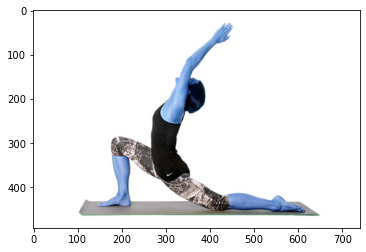

In [50]:
plt.imshow(cv2.imread(example))

In [44]:
#pose estimation function
def estimate_keypoints(image_path):

    with mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.5) as pose:
        
        image = cv2.imread(image_path)
        print(image.shape)
        image_height, image_width, _ = image.shape
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        try:
            keypoints = results.pose_landmarks.landmark
        except:
            print("cant estimate keypoints")
            
        return keypoints

In [45]:
def draw_keypoints(image_path):
    
    with mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.5) as pose:
        image = cv2.imread(image_path)
        image_height, image_width, _ = image.shape
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    return annotated_image

In [46]:
landmarks = estimate_keypoints(example)

(493, 740, 3)


In [6]:
#angle calculation function
def angle_between(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [8]:
#angle dictionary function
def get_angle_dict(image_path):
    
    d = {}
    landmarks  = estimate_keypoints(image_path)
        
    l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    l_knee =  [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
    r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
    l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    
    d['l_wrist_ankle_shoulder'] = angle_between(l_wrist,l_ankle,l_shoulder)
    d['r_wrist_ankle_shoulder'] = angle_between(r_wrist,r_ankle,r_shoulder)
    d['l_elbow_shoulder_hip'] = angle_between(l_elbow ,l_shoulder ,l_hip)
    d['r_elbow_shoulder_hip'] = angle_between(r_elbow ,r_shoulder ,r_hip)
    d['l_hip_knee_ankle'] = angle_between(l_hip,l_knee, l_ankle)
    d['r_hip_knee_ankle'] = angle_between(r_hip,r_knee, r_ankle)
    
    return d

In [51]:
dit = get_angle_dict(example)
dit

(493, 740, 3)


{'l_wrist_ankle_shoulder': 17.616390708173004,
 'r_wrist_ankle_shoulder': 0.1941964602282492,
 'l_elbow_shoulder_hip': 164.7191536092135,
 'r_elbow_shoulder_hip': 166.64802047628322,
 'l_hip_knee_ankle': 145.76760411304346,
 'r_hip_knee_ankle': 44.27662504461111}

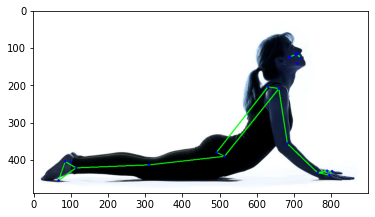

In [38]:
plt.imshow(draw_keypoints(example))

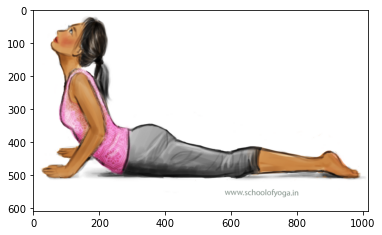

In [79]:
plt.imshow(cv2.cvtColor(cv2.imread(example),cv2.COLOR_BGR2RGB))

In [47]:
ground_truth = {}
for pose in poses:
    
    avg_angle_dict = {}
    print(pose)
    for image in os.listdir(data_dir + pose):
        print(image)
        image_path = os.path.join(os.path.join(data_dir,pose),image)
        angle_dict = get_angle_dict(image_path)
        for angle in angle_dict:
            if angle not in avg_angle_dict:
                avg_angle_dict[angle] = angle_dict[angle]
            else:
                avg_angle_dict[angle] += angle_dict[angle]
    
    for angle in avg_angle_dict:
        avg_angle_dict[angle] /= len(os.listdir(data_dir + pose))
        
    ground_truth[pose] = avg_angle_dict

down_dog
00000003.jpg
(1365, 2048, 3)
00000012.jpg
(1061, 1810, 3)
00000024.jpg
(667, 1000, 3)
00000049.jpg
(675, 1200, 3)
00000060.jpg
(212, 353, 3)
00000126.jpg
(300, 300, 3)
00000140.jpg
(667, 999, 3)
goddess
00000002.jpeg
(720, 960, 3)
00000010.jpg
(425, 520, 3)
00000011.jpg
(465, 550, 3)
00000036.jpg
(728, 728, 3)
00000060.jpg
(823, 1024, 3)
00000337.jpg
(2448, 3264, 3)
00000384.jpg
(160, 160, 3)
Legs-Up-the-Wall_Pose_or_Viparita_Karani
109.jpg
(800, 1200, 3)
411.jpg
(359, 609, 3)
437.jpg
(302, 251, 3)
65.jpg
(608, 609, 3)
67.jpg
(400, 400, 3)
69.jpg
(192, 300, 3)
75.jpg
(353, 655, 3)
Low_Lunge_pose_or_Anjaneyasana
145.jpg
(3672, 2448, 3)
299.jpg
(358, 540, 3)
317.jpg
(320, 450, 3)
4.jpg
(493, 740, 3)
462.jpg
(1090, 1500, 3)
521.jpg
(280, 346, 3)
66.jpg
(505, 614, 3)
Plank_Pose_or_Kumbhakasana
00000001.jpg
(380, 650, 3)
00000006.JPG
(2448, 3264, 3)
00000011.jpg
(231, 397, 3)
00000107.jpg
(265, 380, 3)
178.jpg
(321, 450, 3)
30.jpg
(427, 640, 3)
77.jpg
(152, 300, 3)
Standing_Forward

UnboundLocalError: local variable 'keypoints' referenced before assignment

In [48]:
ground_truth

{'down_dog': {'l_wrist_ankle_shoulder': 31.224254701996195,
  'r_wrist_ankle_shoulder': 31.676046039970988,
  'l_elbow_shoulder_hip': 171.28018073806925,
  'r_elbow_shoulder_hip': 171.27677458229158,
  'l_hip_knee_ankle': 177.9431691982648,
  'r_hip_knee_ankle': 176.60727848406},
 'goddess': {'l_wrist_ankle_shoulder': 16.094693911404622,
  'r_wrist_ankle_shoulder': 14.86564232053498,
  'l_elbow_shoulder_hip': 86.23734475403606,
  'r_elbow_shoulder_hip': 84.70379647625838,
  'l_hip_knee_ankle': 120.9387478773459,
  'r_hip_knee_ankle': 129.40545333329396},
 'Legs-Up-the-Wall_Pose_or_Viparita_Karani': {'l_wrist_ankle_shoulder': 20.24826260604313,
  'r_wrist_ankle_shoulder': 21.775503483208528,
  'l_elbow_shoulder_hip': 82.93331396399357,
  'r_elbow_shoulder_hip': 52.72098477542666,
  'l_hip_knee_ankle': 170.21372675942013,
  'r_hip_knee_ankle': 167.29760253211444},
 'Low_Lunge_pose_or_Anjaneyasana': {'l_wrist_ankle_shoulder': 20.93408241890217,
  'r_wrist_ankle_shoulder': 3.70985987480290

In [52]:
import json

In [59]:
with open("./gound_truth_angles.json") as file:
    ground_truth = json.loads(file.read())

In [60]:
ground_truth

{'Standing_Forward_Bend_pose_or_Uttanasana': {'l_wrist_ankle_shoulder': 57.47588769608259,
  'r_wrist_ankle_shoulder': 66.1897023142865,
  'l_elbow_shoulder_hip': 105.04013832841349,
  'r_elbow_shoulder_hip': 110.76284121308777,
  'l_hip_knee_ankle': 153.35794565528786,
  'r_hip_knee_ankle': 164.23947101606393},
 'warrior_pose': {'l_wrist_ankle_shoulder': 26.03675596444077,
  'r_wrist_ankle_shoulder': 23.736131523799372,
  'l_elbow_shoulder_hip': 97.7163351201416,
  'r_elbow_shoulder_hip': 85.9159714320902,
  'l_hip_knee_ankle': 112.81010930644362,
  'r_hip_knee_ankle': 166.4705417182269},
 'down_dog': {'l_wrist_ankle_shoulder': 30.200937458015588,
  'r_wrist_ankle_shoulder': 30.918952618593625,
  'l_elbow_shoulder_hip': 171.06992802954912,
  'r_elbow_shoulder_hip': 170.35703638231087,
  'l_hip_knee_ankle': 177.75303382185444,
  'r_hip_knee_ankle': 175.9937239007421},
 'Legs-Up-the-Wall_Pose_or_Viparita_Karani': {'l_wrist_ankle_shoulder': 20.17897821065927,
  'r_wrist_ankle_shoulder': 